<a href="https://colab.research.google.com/github/deepasharma06/Data602/blob/main/Copy_of_08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction
I wanted to use Russia's war on Ukraine data available based on border crossing records in the Polish border to figure out which border crossing had the most number of refugees entering so that international aid agencies can plan resource allocation based on the needs in each area.

Russia's war on Ukraine has resulted in millions of people being displaced from their country. Most of them have entered Poland which is a neighboring country to Ukraine. 

Dataset was taken from Kaggle. Link here: https://www.kaggle.com/datasets/krystianadammolenda/refugees-from-ukraine-poland?resource=download



# Load library

In [32]:
import pandas as pd
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# I loaded data from Kaggle to my Github and loaded to Colab.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/deepasharma06/Data602/main/border_traffic_UA_PL_01_03.csv")
df.head()

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
0,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,BY,0,7,0
1,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,DE,UE,29,0
2,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,TR,0,2,0
3,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,UA,0,389,0
4,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,LV,UE,3,0


______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [5]:
df = pd.DataFrame(df)
df

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
0,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,BY,0,7,0
1,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,DE,UE,29,0
2,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,TR,0,2,0
3,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,UA,0,389,0
4,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,LV,UE,3,0
...,...,...,...,...,...,...,...,...,...,...
54228,Hrubieszow,Zosin-Ustilug,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,105
54229,Hrubieszow,Zosin-Ustilug,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,254
54230,Hrubieszow,Zosin-Ustilug,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,1
54231,Hrubieszow,Zosin-Ustilug,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,124


In [6]:
df.describe()# use describe function to find the Summary statistics means, medians, quartiles

,Number of persons (checked-in),Number of people (evacuated)
count,54233.000000,54233.000000
mean,78.063485,33.785555
std,681.611425,312.917389
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,1.000000
max,24662.000000,13641.000000


In [7]:
df.isnull().sum()#Find how many missing values there are per column:

Border Guard Post                  0
Border crossing                   81
Type of border crossing            0
Border Guard Unit                  0
Date                               0
Direction to / from Poland         0
Citizenship (code)                26
UE / Schengen                      0
Number of persons (checked-in)     0
Number of people (evacuated)       0
dtype: int64

# Visualize the number of missing values as a bar chart

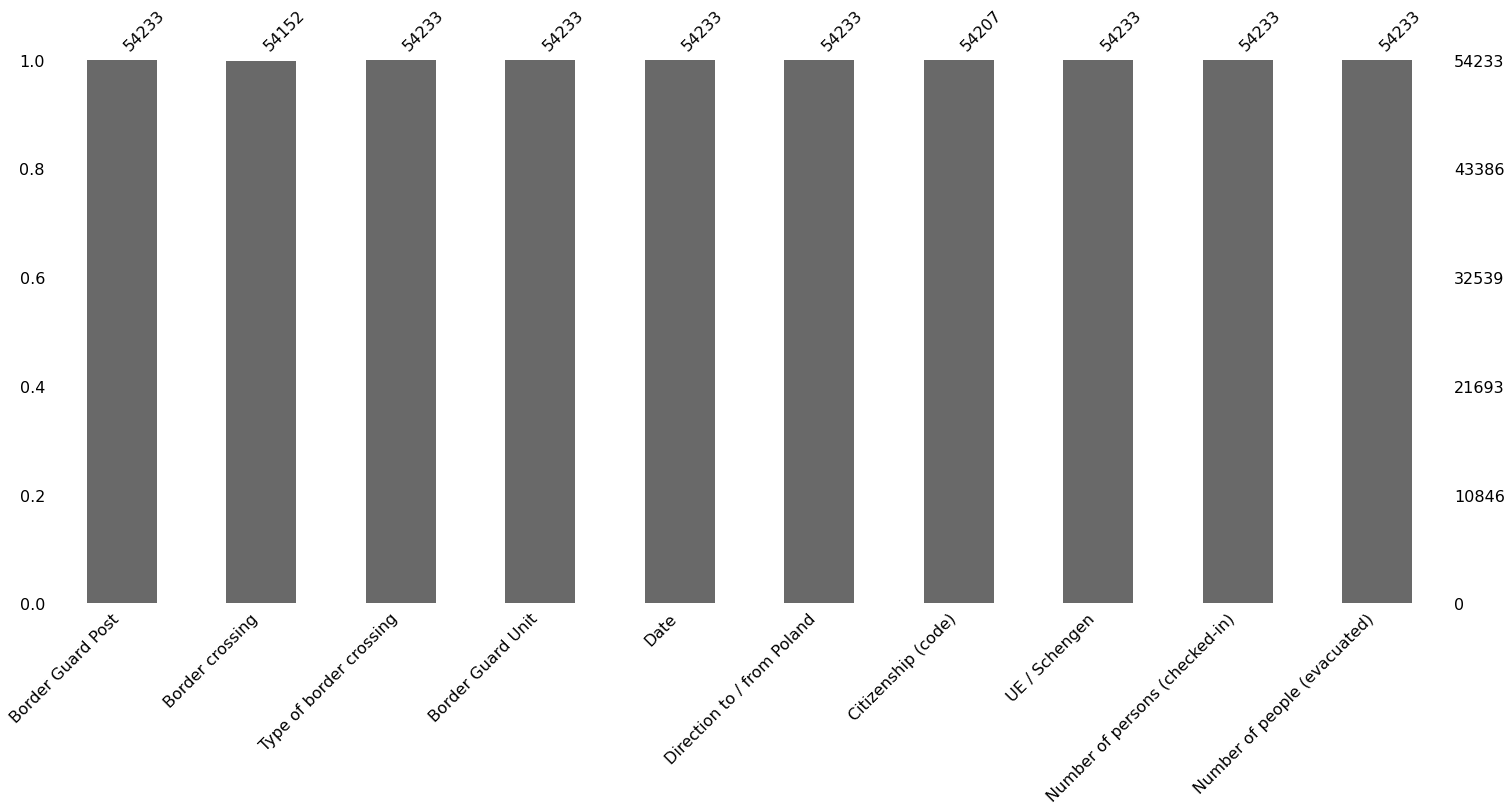

In [8]:
import missingno as msno
msno.bar(df)

In [9]:
# Top Countries by frequency
top_Country= list(df['Citizenship (code)'].value_counts().head(10).reset_index().head(10)['index'])
top_Country

['UA', 'PL', 'RU', 'BY', 'DE', 'GE', 'US', 'MD', 'RO', 'LT']

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [11]:
#from sklearn.preprocessing import Imputer


#Filling missing value column
Let first work with Border crossing column

In [12]:
null_values_df = df[df['Border crossing'].isna()]# there 81 rows for NAN for Border Crossing colunn 
null_values_df

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
34020,Medyka,NaN,road,Bieszczadzki,2022-01-25,arrival in Poland,US,0,0,6
34021,Medyka,NaN,road,Bieszczadzki,2022-01-25,arrival in Poland,CA,0,0,5
34022,Korczowa,NaN,road,Bieszczadzki,2022-01-28,arrival in Poland,CA,0,0,2
34023,Korczowa,NaN,road,Bieszczadzki,2022-02-05,arrival in Poland,CA,0,0,2
34024,Dorohusk,NaN,road,Nadbuzanski,2022-02-12,arrival in Poland,FR,0,0,4
...,...,...,...,...,...,...,...,...,...,...
34099,Lubaczow,NaN,road,Bieszczadzki,2022-02-21,arrival in Poland,US,0,0,64
34100,Hrebenne,NaN,road,Nadbuzanski,2022-02-22,arrival in Poland,UA,0,0,68
34101,Medyka,NaN,road,Bieszczadzki,2022-02-22,arrival in Poland,US,0,0,2
34102,Hrebenne,NaN,road,Nadbuzanski,2022-02-22,arrival in Poland,IE,UE,0,1


We can see that there are 81 rows NaN value for Border crossing column.

To fullfill the null values, let's check what are the 'Border crossing' 
values for the same 'Border Guard Post', 'Type of border crossing' and 'Border Guard Unit'. First, let's find how many unique values we have for each of the columns.



In [13]:
null_values_df['Border Guard Post'].unique()

array(['Medyka', 'Korczowa', 'Dorohusk', 'Hrebenne', 'Lubaczow'],
      dtype=object)

In [14]:
null_values_df['Type of border crossing'].unique()


array(['road'], dtype=object)

In [15]:
null_values_df['Border Guard Unit'].unique()

array(['Bieszczadzki', 'Nadbuzanski'], dtype=object)

#Now, we found out that we have 5 Border Guard Posts, 2 Border Guard Units and all of them were crossed by road. Let's see what null values should be using the information we've got.



In [16]:
medyka_df = df[(df['Border Guard Post'] == 'Medyka') &
                 (df['Type of border crossing'] == 'road') &
                 (df['Border Guard Unit'] == 'Bieszczadzki')]
medyka_df

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
120,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-01-01,arrival in Poland,IT,UE,3,0
121,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-01-01,arrival in Poland,MD,0,1,0
122,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-01-01,arrival in Poland,DE,UE,16,0
123,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-01-01,arrival in Poland,LT,UE,1,0
124,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-01-01,arrival in Poland,PT,UE,1,0
...,...,...,...,...,...,...,...,...,...,...
54126,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,975
54127,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,2
54128,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,511
54129,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-03-31,arrival in Poland,UZ,0,0,4


# Now it's pretty clear that our null values should be equal to 'Medyka-Szeginie'. But let's check for other unique values.

In [17]:
medyka_df['Border crossing'].unique()

array(['Medyka-Szeginie', nan], dtype=object)

#We've got confirmation that there are no values other than "Medyka-Szeginie" and "NaN", which means that "NaN" values for Medyka Guard Post can be replaced with "Medyka-Szeginie". Let's do the same method to find correct values for the other Border Guard Posts.



In [18]:
korczowa_df = df[(df['Border Guard Post'] == 'Korczowa') &
                               (df['Type of border crossing'] == 'road') &
                               (df['Border Guard Unit'] == 'Bieszczadzki')]
korczowa_df


,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
64,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-01-01,arrival in Poland,ES,UE,2,0
65,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-01-01,arrival in Poland,IL,0,1,0
66,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-01-01,arrival in Poland,LV,UE,3,0
67,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-01-01,arrival in Poland,PT,UE,10,0
68,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-01-01,arrival in Poland,BG,UE,2,0
...,...,...,...,...,...,...,...,...,...,...
54075,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,2
54076,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,426
54077,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,1
54078,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-03-31,arrival in Poland,UZ,0,0,3


In [19]:
korczowa_df['Border crossing'].unique()

array(['Korczowa-Krakowiec', nan], dtype=object)

"NaN" values for Korczowa Guard Post can be replaced with "Korczowa-Krakowiec"

In [20]:
dorohusk_df = df[(df['Border Guard Post'] == 'Dorohusk') &
                               (df['Type of border crossing'] == 'road') &
                               (df['Border Guard Unit'] == 'Nadbuzanski')]
dorohusk_df


,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
0,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,BY,0,7,0
1,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,DE,UE,29,0
2,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,TR,0,2,0
3,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,UA,0,389,0
4,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-01,arrival in Poland,LV,UE,3,0
...,...,...,...,...,...,...,...,...,...,...
54164,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,337
54165,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,274
54166,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,2
54167,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,163


"NaN" values for Dorohusk Guard Post can be replaced with "Dorohusk-Jagodzin"

In [21]:
hrebenne_df = df[(df['Border Guard Post'] == 'Hrebenne') &
                               (df['Type of border crossing'] == 'road') &
                               (df['Border Guard Unit'] == 'Nadbuzanski')]
hrebenne_df

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
40,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-01-01,arrival in Poland,UA,0,247,0
41,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-01-01,arrival in Poland,LT,UE,48,0
42,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-01-01,arrival in Poland,LV,UE,12,0
43,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-01-01,arrival in Poland,HU,UE,1,0
44,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-01-01,arrival in Poland,BY,0,3,0
...,...,...,...,...,...,...,...,...,...,...
54214,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,345
54215,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-03-31,arrival in Poland,UA,0,0,1
54216,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-03-31,arrival in Poland,UZ,0,0,1
54217,Hrebenne,Hrebenne-Rawa Ruska,road,Nadbuzanski,2022-03-31,arrival in Poland,GB,0,0,3


"NaN" values for Hrebenne Guard Post can be replaced with "Hrebenne-Rawa Ruska"

In [22]:
lubaczow_df = df[(df['Border Guard Post'] == 'Lubaczow') &
                               (df['Type of border crossing'] == 'road') &
                               (df['Border Guard Unit'] == 'Bieszczadzki')]
lubaczow_df

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
149,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-01-01,arrival in Poland,RO,UE,1,0
150,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-01-01,arrival in Poland,PT,UE,2,0
151,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-01-01,arrival in Poland,CZ,UE,2,0
152,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-01-01,arrival in Poland,FR,0,4,0
153,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-01-01,arrival in Poland,DE,UE,2,0
...,...,...,...,...,...,...,...,...,...,...
54098,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,335
54099,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,16
54100,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-03-31,arrival in Poland,UA,0,0,216
54101,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-03-31,arrival in Poland,UZ,0,0,1


In [23]:
lubaczow_df['Border crossing'].unique()


array(['Budomierz-Hruszew', nan], dtype=object)

"NaN" values for Lubaczow Guard Post can be replaced with "Budomierz-Hruszew"

As we found out what null values should be, let's assign them to the each Guard Post variable.

In [24]:
medyka = 'Medyka-Szeginie'
korczowa = 'Korczowa-Krakowiec'
dorohusk = 'Dorohusk-Jagodzin'
hrebenne = 'Hrebenne-Rawa Ruska'
lubaczow = 'Budomierz-Hruszew'

Now we can replace null values with the right data. Let's create a function to avoid re-writing code.

In [33]:
def fill_null(border_guard_post: str, border_crossing: str) -> None:
    df.loc[(df['Border Guard Post'] == border_guard_post) &
                                (df['Border crossing'].isna()),'Border crossing'] = border_crossing

With this created function we can do the same job without re-writing same code. Two arguments should be provided to the function. First one is 'Border Guard Post', in our case we have 5 of them (Medyka, Korczowa, Dorohusk, Hrebenne, Lubaczow). Second argument are variables which we specified earlier containing the information which replaces null values. After providing required arguments to the function, it filters out our original dataframe to get only those rows which have null values and border guard post is same with the provided argument. The output of the filtering will be series of data, which we get by using .loc method. Then we get the 'Border crossing' column and set its value to the correct data.

Let's print sample of null values to check how our

In [34]:
df.loc[34020:34024]

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
34020,Medyka,NaN,road,Bieszczadzki,2022-01-25,arrival in Poland,US,0,0,6
34021,Medyka,NaN,road,Bieszczadzki,2022-01-25,arrival in Poland,CA,0,0,5
34022,Korczowa,NaN,road,Bieszczadzki,2022-01-28,arrival in Poland,CA,0,0,2
34023,Korczowa,NaN,road,Bieszczadzki,2022-02-05,arrival in Poland,CA,0,0,2
34024,Dorohusk,NaN,road,Nadbuzanski,2022-02-12,arrival in Poland,FR,0,0,4


In [35]:
fill_null('Medyka', medyka)

In [30]:
df.loc[34020:34024]

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
34020,Medyka,NaN,road,Bieszczadzki,2022-01-25,arrival in Poland,US,0,0,6
34021,Medyka,NaN,road,Bieszczadzki,2022-01-25,arrival in Poland,CA,0,0,5
34022,Korczowa,NaN,road,Bieszczadzki,2022-01-28,arrival in Poland,CA,0,0,2
34023,Korczowa,NaN,road,Bieszczadzki,2022-02-05,arrival in Poland,CA,0,0,2
34024,Dorohusk,NaN,road,Nadbuzanski,2022-02-12,arrival in Poland,FR,0,0,4


As we can see, our function replaces null values with the right data. Let's do the same for other null values.

In [36]:
fill_null('Korczowa', korczowa)
fill_null('Dorohusk', dorohusk)
fill_null('Hrebenne', hrebenne)
fill_null('Lubaczow', lubaczow)

Now let's check whole dataframe for null values in 'Border crossing' column.

In [37]:
df[df['Border crossing'].isna()]

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)


In [38]:
# Let's check to Citizen Column
df[df['Citizenship (code)'].isnull()]

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated)
11719,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-02-26,arrival in Poland,NaN,0,19,0
12730,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-02-27,arrival in Poland,NaN,0,8,0
12899,Medyka,Przemysl-Mosciska,railway,Bieszczadzki,2022-02-27,arrival in Poland,NaN,0,4,0
12943,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-02-27,arrival in Poland,NaN,0,1,0
13609,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-02-28,arrival in Poland,NaN,0,5,0
13746,Medyka,Przemysl-Mosciska,railway,Bieszczadzki,2022-02-28,arrival in Poland,NaN,0,1,0
13874,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-02-28,arrival in Poland,NaN,0,10,0
14416,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-03-01,arrival in Poland,NaN,0,5,0
14651,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-03-01,arrival in Poland,NaN,0,3,0
16449,Dolhobyczow,Dolhobyczow-Uhrynow,road,Nadbuzanski,2022-03-03,arrival in Poland,NaN,0,1,0


Now I can see that null values started to appear from 26th of February, after the war between Russia and Ukraine has started. This might be the reason, cause many people were evacuating to the Poland. I've decided not to skip those rows of data and will leave it as it is.

Converting 'Date' to the proper format.
Also, I will add 'month' and 'day' columns to our data frame.

Double checking 'Date' format.



In [39]:
df.dtypes# check data type for date first

Border Guard Post                 object
Border crossing                   object
Type of border crossing           object
Border Guard Unit                 object
Date                              object
Direction to / from Poland        object
Citizenship (code)                object
UE / Schengen                     object
Number of persons (checked-in)     int64
Number of people (evacuated)       int64
dtype: object

In [40]:
# Convert Date into Date formate
df['Date'] = pd.to_datetime(df['Date'])

In [41]:
# Check again
df.dtypes

Border Guard Post                         object
Border crossing                           object
Type of border crossing                   object
Border Guard Unit                         object
Date                              datetime64[ns]
Direction to / from Poland                object
Citizenship (code)                        object
UE / Schengen                             object
Number of persons (checked-in)             int64
Number of people (evacuated)               int64
dtype: object

Date formate has change from object to datetime, now we can add our 'month' and 'day' columns. Also, at this stage I would like to add another column called 'Total arrived / departured', cause as we can see from our data frame, number of people arrived/departured are split to two categories (Number of person checked-in and evacuated).

In [44]:
df['Total arrived / departured'] = df['Number of persons (checked-in)'] + df['Number of people (evacuated)']
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

Columns were created. Let's check our dataframe.

In [45]:
df.sample(10)

,Border Guard Post,Border crossing,Type of border crossing,Border Guard Unit,Date,Direction to / from Poland,Citizenship (code),UE / Schengen,Number of persons (checked-in),Number of people (evacuated),Total arrived / departured,Month,Day
20627,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-03-09,arrival in Poland,SS,0,1,0,1,3,9
31427,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-03-30,departure from Poland,DE,UE,31,0,31,3,30
11642,Dolhobyczow,Dolhobyczow-Uhrynow,road,Nadbuzanski,2022-02-25,arrival in Poland,IT,UE,1,0,1,2,25
27095,Lubaczow,Budomierz-Hruszew,road,Bieszczadzki,2022-03-20,arrival in Poland,RU,0,5,0,5,3,20
31252,Hrubieszow,Zosin-Ustilug,road,Nadbuzanski,2022-03-30,arrival in Poland,GE,0,1,0,1,3,30
1880,Korczowa,Korczowa-Krakowiec,road,Bieszczadzki,2022-01-09,arrival in Poland,DE,UE,97,0,97,1,9
53417,Dorohusk,Dorohusk-Jagodzin,railway,Nadbuzanski,2022-03-27,arrival in Poland,GE,0,0,1,1,3,27
8383,Medyka,Medyka-Szeginie,road,Bieszczadzki,2022-02-12,arrival in Poland,LT,UE,1,0,1,2,12
12504,Dorohusk,Dorohusk-Jagodzin,railway,Nadbuzanski,2022-02-27,arrival in Poland,IQ,0,1,0,1,2,27
184,Dorohusk,Dorohusk-Jagodzin,road,Nadbuzanski,2022-01-02,departure from Poland,PT,UE,3,0,3,1,2


# Visualizations using Matplotlib library

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



# Visualization with Matplotlib library

In [46]:
from matplotlib import pyplot as plt

# Scatter and line plot

In [47]:
# Scatter plot
df['crossing_date'] = pd.DatetimeIndex(df['Date']).date
df_date = df[['crossing_date', 'Number of people (evacuated)','Number of persons (checked-in)']].groupby('crossing_date').sum().reset_index()
df_date_2 = df.groupby('crossing_date').size().reset_index()
#print(df_date_2)
fig = px.line(title = 'Ukrainian-Polish border traffic')
fig.add_scatter(x=df_date['crossing_date'], y=df_date['Number of people (evacuated)'], name = 'People saved')
#fig.add_scatter(x=df_date_2['crossing_date'], y=df_date_2[0], mode='lines',name="Times the border is crossed")
fig.add_scatter(x=df_date['crossing_date'],y=df_date['Number of persons (checked-in)'],name="People checked-in")
fig.show()

In [54]:
# Let's create dataframe containing data only for departure
departured_from = df[df['Direction to / from Poland'] == 'departure from Poland']

# Grouping by border guard post.
guard_post_departure = departured_from.groupby('Border Guard Post').sum().sort_values('Total arrived / departured', ascending=False)
# Setting index as numbers, was Guard Post before.
guard_post_departure.reset_index(level=0, inplace=True)
guard_post_departure.drop(columns=['Month','Day'])

,Border Guard Post,Number of persons (checked-in),Number of people (evacuated),Total arrived / departured
0,Medyka,290655,0,290655
1,Korczowa,198977,0,198977
2,Dorohusk,164095,0,164095
3,Hrebenne,146102,0,146102
4,Hrubieszow,63301,0,63301
5,Lubaczow,55392,0,55392
6,Kroscienko,28529,0,28529
7,Dolhobyczow,27586,0,27586
8,Horyniec-Zdroj,227,0,227


In [52]:
# Let's create dataframe containing data only for arrival
arrived_in = df[df['Direction to / from Poland'] == 'arrival in Poland']

# Grouping by border guard post.
guard_post_arrive = arrived_in.groupby('Border Guard Post').sum().sort_values('Total arrived / departured', ascending=False)
# Setting index as numbers, was Guard Post before.
guard_post_arrive.reset_index(level=0, inplace=True)
guard_post_arrive.drop(columns=['Month','Day'])

,Border Guard Post,Number of persons (checked-in),Number of people (evacuated),Total arrived / departured
0,Medyka,860432,483869,1344301
1,Dorohusk,465385,295632,761017
2,Korczowa,547752,212273,760025
3,Hrebenne,431890,226335,658225
4,Dolhobyczow,267597,187124,454721
5,Lubaczow,288508,163056,451564
6,Hrubieszow,259033,175640,434673
7,Kroscienko,137929,88363,226292
8,Horyniec-Zdroj,227,0,227


In [57]:
##Which Border Guard Post was mostly used by Non-Ukrainian citizens for arrival in Ukraine

post_departure = departured_from[departured_from['Citizenship (code)'] != 'UA'].groupby('Border Guard Post').sum().sort_values('Total arrived / departured', ascending=False).drop(columns=['Month', 'Day'])
post_departure


,Number of persons (checked-in),Number of people (evacuated),Total arrived / departured
Border Guard Post,,,
Medyka,38846,0,38846
Korczowa,28052,0,28052
Hrebenne,19523,0,19523
Dorohusk,12469,0,12469
Lubaczow,5700,0,5700
Kroscienko,5463,0,5463
Hrubieszow,4625,0,4625
Dolhobyczow,2979,0,2979


In [58]:
#Which Border Guard Post was mostly used by Ukrainian citizens for arrival in Poland
post_arrival = arrived_in[arrived_in['Citizenship (code)'] == 'UA'].groupby('Border Guard Post').sum().sort_values('Total arrived / departured', ascending=False).drop(columns=['Month', 'Day'])
post_arrival

,Number of persons (checked-in),Number of people (evacuated),Total arrived / departured
Border Guard Post,,,
Medyka,795217,447100,1242317
Dorohusk,443402,286270,729672
Korczowa,501595,192969,694564
Hrebenne,400180,208815,608995
Dolhobyczow,257774,179676,437450
Lubaczow,271793,152208,424001
Hrubieszow,248267,168010,416277
Kroscienko,128307,85248,213555
Horyniec-Zdroj,227,0,227


Text(0.5, 1.0, 'Which Border Guard Post was mostly used by Non-Ukrainian citizens for arrival in Ukraine?')

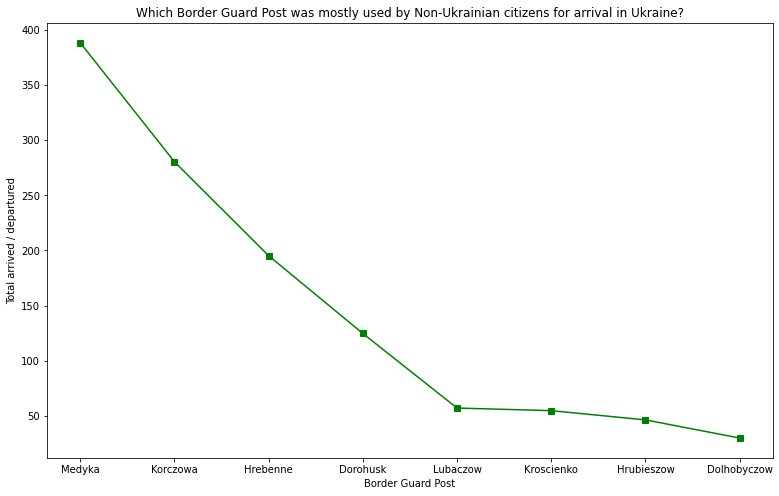

In [59]:
plt.figure(figsize=(13,8))
plt.plot(post_departure.index, (post_departure['Total arrived / departured']/10**2), color="green",marker = "s")
plt.xlabel("Border Guard Post")
plt.ylabel("Total arrived / departured")
plt.title("Which Border Guard Post was mostly used by Non-Ukrainian citizens for arrival in Ukraine?")
#plt.plot(post_arrival.index, (post_arrival ['Total arrived / departured']/10**2), color="red",marker = "o")


Text(0.5, 1.0, 'Which Border Guard Post was mostly used by Ukrainian citizens for arrival in Poland?')

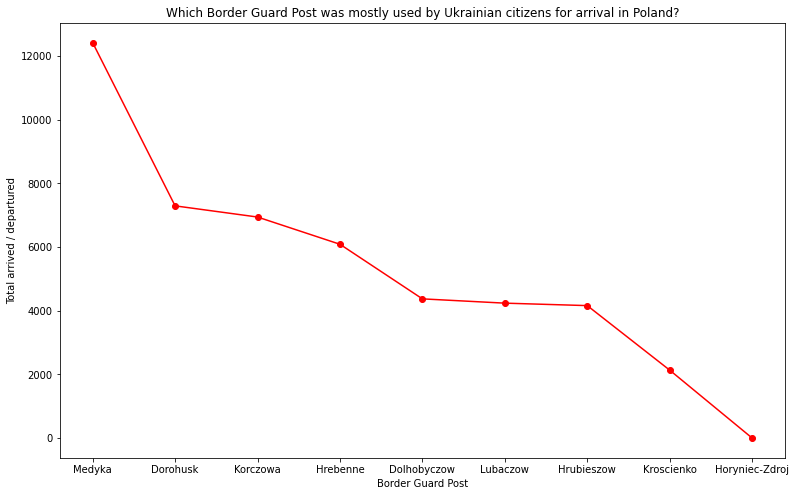

In [60]:
plt.figure(figsize=(13,8))
plt.plot(post_arrival.index, (post_arrival ['Total arrived / departured']/10**2), color="red",marker = "o")
plt.xlabel("Border Guard Post")
plt.ylabel("Total arrived / departured")
plt.title("Which Border Guard Post was mostly used by Ukrainian citizens for arrival in Poland?")

# Bar Plot for Border crossing vs Total arrive/departure

Text(0.5, 1.0, 'Border crossing vs Total arrive/departure')

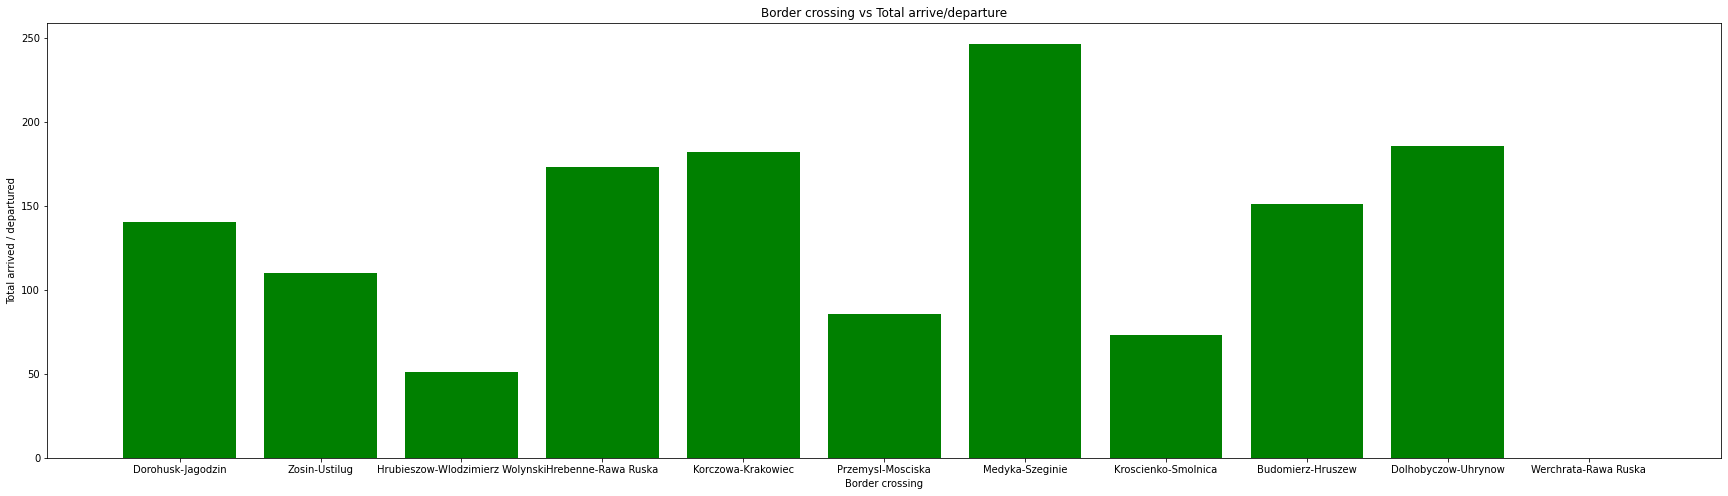

In [65]:
plt.figure(figsize=(30,8))
plt.bar(df['Border crossing'], (df ['Total arrived / departured']/10**2), color="green")
plt.xlabel("Border crossing")
plt.ylabel("Total arrived / departured")
plt.title("Border crossing vs Total arrive/departure")

# We can see that Medyka-szeginie border crossing got most traffic. Also see that Serchrata-Rawa Ruska border crossing got no traffic accroding to the given data.

Text(0.5, 1.0, 'Which Border Guard Post was mostly used by Ukrainian citizens for arrival in Poland?')

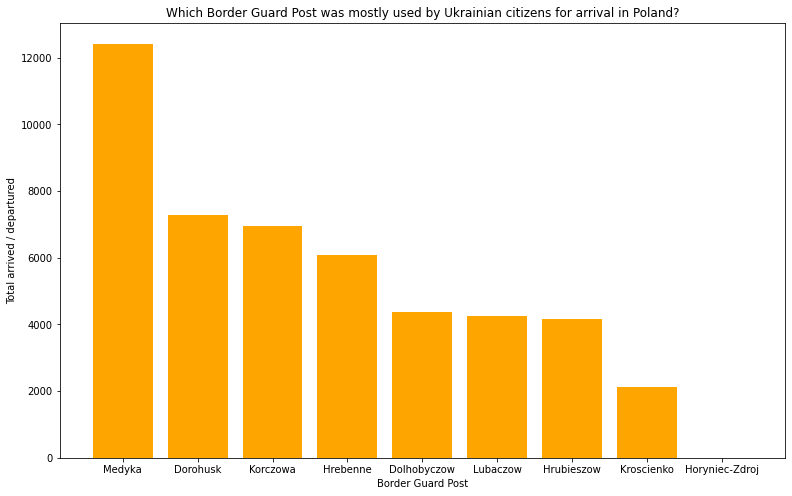

In [66]:
#s = sns.barplot(x='Border Guard Post', y='Total arrived / departured', data = guard_post_arrive, ax=axes[0]);
plt.figure(figsize=(13,8))
plt.bar(post_arrival.index, (post_arrival ['Total arrived / departured']/10**2), color="orange")
plt.xlabel("Border Guard Post")
plt.ylabel("Total arrived / departured")
plt.title("Which Border Guard Post was mostly used by Ukrainian citizens for arrival in Poland?")

 # In the above bar plot we see that Medyka Border Guard Post got most traffic.

# Visualization with Seaborn library
# Bar Plot
# Let's create dataframe containing data only for arrival

In [53]:
import seaborn as sns

# Let's create dataframe containing data only for departure

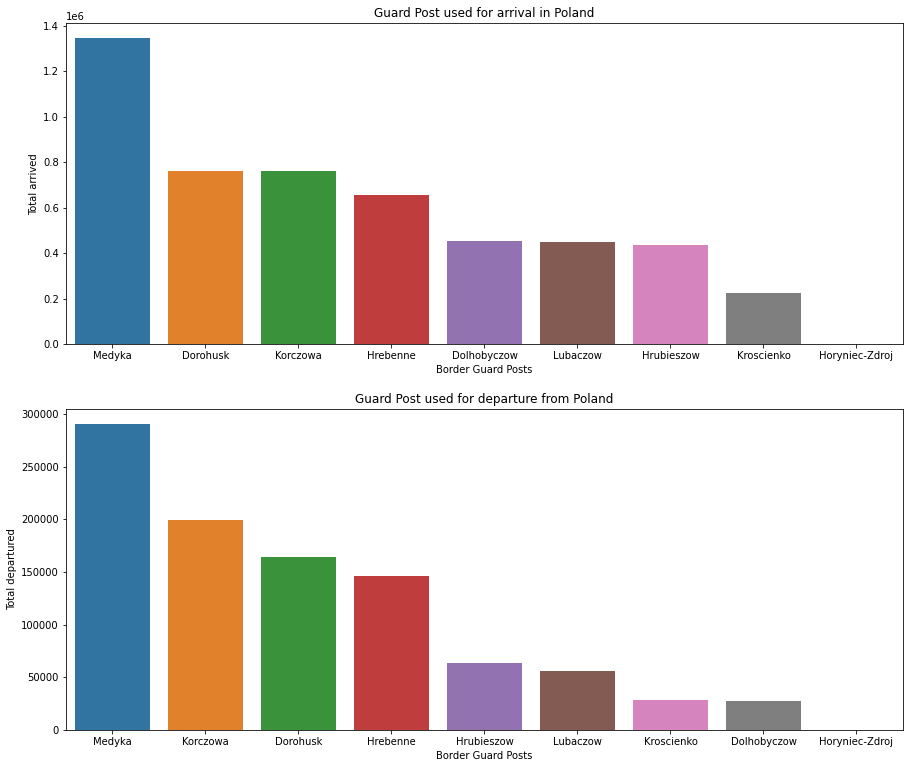

In [55]:
fig, axes = plt.subplots(2,1, figsize=(15,13))

# Total arrived
axes[0].set_title('Guard Post used for arrival in Poland')
s = sns.barplot(x='Border Guard Post', y='Total arrived / departured', data = guard_post_arrive, ax=axes[0]);
s.set(xlabel='Border Guard Posts', ylabel='Total arrived');
# Total departured
axes[1].set_title('Guard Post used for departure from Poland')
s = sns.barplot(x='Border Guard Post', y='Total arrived / departured', data = guard_post_departure, ax=axes[1]);
s.set(xlabel='Border Guard Posts', ylabel='Total departured');


# We can see in the above barplot:
*   Mostly used guard post for departure from Poland is Medyka.
*   Mostly used guard post for arrival from Poland is Medyka.

# So Medyka guard post got most traffic.

## Countplot using Seaborn library

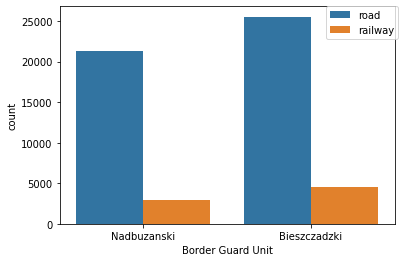

In [56]:
sns.countplot(x="Border Guard Unit",
data=df,
hue="Type of border crossing")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

# In the above countplot we see that people used road than the railroad. Also Bieszczadzki border guard unit got more traffic than Nadbuzanski. For railway border crossing both Nadbuzanski and Bieszczadzki almost same traffic.

#Scatter plot using Seaborn

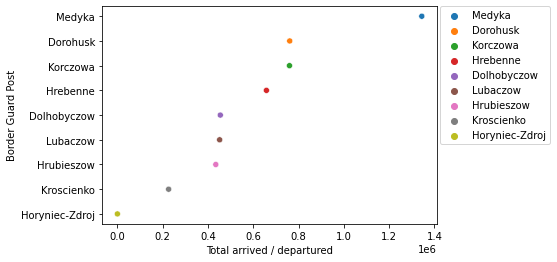

In [61]:
#Legend outside the grapg by using Matplotlib
sns.scatterplot(x='Total arrived / departured', y ='Border Guard Post',
data=guard_post_arrive,
hue="Border Guard Post")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
#plt.title("Seaborn Plot with Legend Outside")
#plt.tight_layout()
plt.savefig("place_legend_outside_plot_Seaborn_scatterplot.png",
                    format='png',dpi=150)
plt.show()


In [63]:
# for January
january_arrived = df[(df['Month'] == 1) & (df['Direction to / from Poland'] == 'arrival in Poland')]
january_departured = df[(df['Month'] == 1) & (df['Direction to / from Poland'] == 'departure from Poland')]

# for February
february_arrived = df[(df['Month'] == 2) & (df['Direction to / from Poland'] == 'arrival in Poland')]
february_departured = df[(df['Month'] == 2) & (df['Direction to / from Poland'] == 'departure from Poland')]

# for March 
march_arrived = df[(df['Month'] == 3) & (df['Direction to / from Poland'] == 'arrival in Poland')]
march_departured = df[(df['Month'] == 3) & (df['Direction to / from Poland'] == 'departure from Poland')]

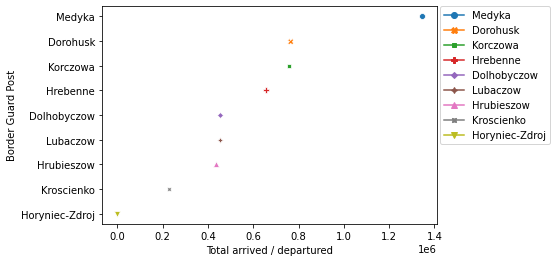

In [64]:
sns.lineplot(
    data=guard_post_arrive,
    x="Total arrived / departured", y="Border Guard Post", hue="Border Guard Post", style="Border Guard Post",
    markers=True, dashes=False,lw = 10
 )
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

# In the above line plot we see that:

*   Medyka guard post got most arrival and departure from Poland
*   Horynier-Zdroj guard post got least arrival and departure from Poland



# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  


After my analysis we see that: 
* people used road than the railroad.
* Bieszczadzki border guard unit got more traffic than Nadbuzanski.
* Railway border crossing both Nadbuzanski and Bieszczadzki almost same traffic.
* Medyka guard post got most arrival and departure from Poland
* Horynier-Zdroj guard post got least arrival and departure from      PolandBieszczadzki border guard unit got more traffic than Nadbuzanski.
* Both Nadbuzanski and Bieszczadzki got almost same traffic for railway border crossing.

# Challenge:
One challenge I found here is the data cleaning and putting info in the world map. Doing more dipper on this data for final project.